In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [22]:
from io import StringIO
import urllib.request
allRunsVec = []
runVec = []
#runs = [x for x in range(15922,15923)]+[x for x in range(24298,24300)]
#runs = [24300, 24350]
#runs = [x for x in range(24300,24301)] 
#runs = [x for x in range(26198,26202)]
runs = [x for x in range(26090, 26170,2)]


print(runs)
for run in runs:
    print("Starting run:", run)
    xtalGainVec = []
    for calo in range(1,25):
            db_request = ("http://dbdata0vm.fnal.gov:9091/QE/gm2/dev/app/SQ/query?dbname=postgres_dev&t="
                          +"nearline_sync_energy_constants&w=validfromrun:"
                          +str(run)+"&w=calonum:"
                          +str(calo)+"&w=isvalid:t&o=-validfromrun&o=-generatedtime&l=1")
            print(db_request)
            ding = urllib.request.urlopen(db_request)
            ding = ding.read()

            f = StringIO(str(ding))
            #print(f)
            reader = csv.reader(f, delimiter=',')
            for item in reader:
                #print(item)
                try:
                    ding = (item[10])[1:-1].split(",")
                    #print(ding)
                    for dong in ding:
                        xtalGainVec.append(float(dong))
                except:
                    continue
    if(len(xtalGainVec) > 0):
        allRunsVec.append(xtalGainVec)
        runVec.append(run)

[26090, 26092, 26094, 26096, 26098, 26100, 26102, 26104, 26106, 26108, 26110, 26112, 26114, 26116, 26118, 26120, 26122, 26124, 26126, 26128, 26130, 26132, 26134, 26136, 26138, 26140, 26142, 26144, 26146, 26148, 26150, 26152, 26154, 26156, 26158, 26160, 26162, 26164, 26166, 26168]
Starting run: 26090
Starting run: 26092
Starting run: 26094
Starting run: 26096
Starting run: 26098
Starting run: 26100
Starting run: 26102
Starting run: 26104
Starting run: 26106
Starting run: 26108
Starting run: 26110
Starting run: 26112
Starting run: 26114
Starting run: 26116
Starting run: 26118
Starting run: 26120
Starting run: 26122
Starting run: 26124
Starting run: 26126
Starting run: 26128
Starting run: 26130
Starting run: 26132
Starting run: 26134
Starting run: 26136
Starting run: 26138
Starting run: 26140
Starting run: 26142
Starting run: 26144
Starting run: 26146
Starting run: 26148
Starting run: 26150
Starting run: 26152
Starting run: 26154
Starting run: 26156
Starting run: 26158
Starting run: 26160

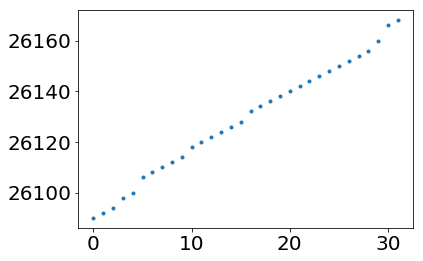

In [23]:
plt.plot(runVec,".")

In [24]:
print([len(x) for x in allRunsVec])

[1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296, 1296]


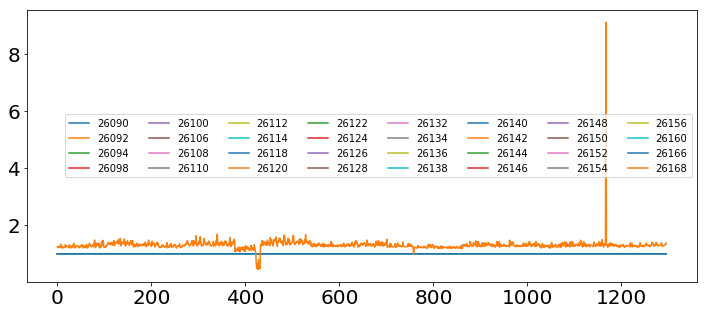

In [25]:
fig,ax = plt.subplots(figsize=(12,5))
for i, xtals in enumerate(allRunsVec):
    plt.plot(xtals,label=runVec[i])
    plt.legend(ncol=8)
plt.show()

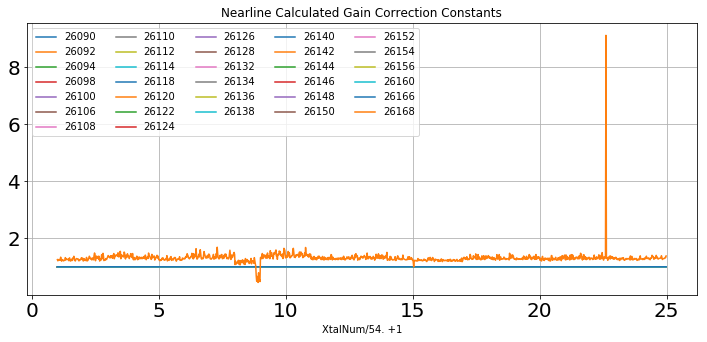

In [26]:
noint()
fig,ax = plt.subplots(figsize=(12,5))
for i, xtals in enumerate(allRunsVec):
    plt.plot([x/54.+1 for x in range(54*24)], xtals,"-",label=runVec[i])
plt.legend(ncol=5)
plt.title("Nearline Calculated Gain Correction Constants")
plt.xlabel("XtalNum/54. +1")
#plt.ylim(0.25,1.75)
plt.grid()
plt.show()

In [27]:
means = []
for x in allRunsVec:
    means.append(np.mean(x))

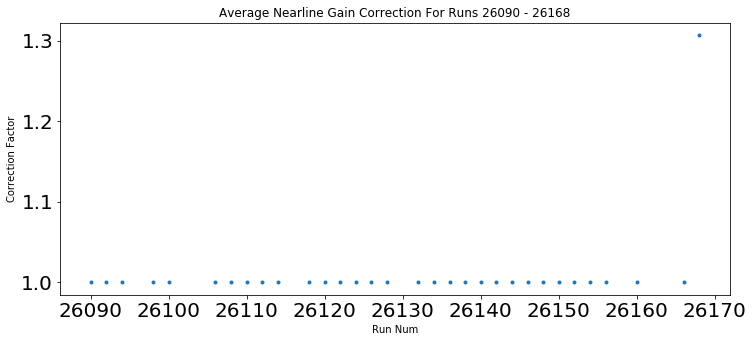

In [28]:
fig,ax = plt.subplots(figsize=(12,5))
plt.title("Average Nearline Gain Correction For Runs "+str(runVec[0])+" - "+str(runVec[len(runVec) -1]))
plt.ylabel("Correction Factor")
plt.xlabel("Run Num")
plt.plot(runVec,means,".")
plt.show()

In [19]:
averageGain = []
for x in zip(*allRunsVec):
    #print(np.mean(x))
    averageGain.append(np.mean(x))

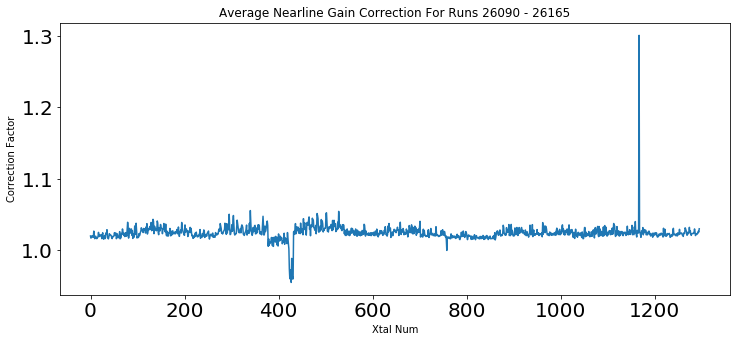

In [20]:
fig,ax = plt.subplots(figsize=(12,5))
plt.title("Average Nearline Gain Correction For Runs "+str(runVec[0])+" - "+str(runVec[len(runVec) -1]))
plt.ylabel("Correction Factor")
plt.xlabel("Xtal Num")
plt.plot(averageGain)
plt.show()

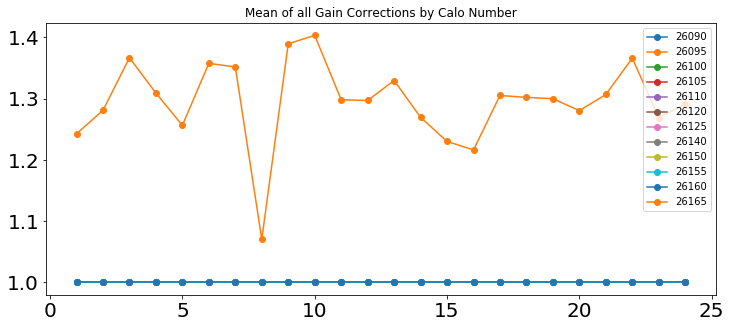

In [21]:
fig,ax = plt.subplots(figsize=(12,5))
for i, xtals in enumerate(allRunsVec):
    caloMean = []
    for calo in range(24):
        caloMean.append(np.mean(xtals[calo*54:(calo+1)*54]))
    plt.plot([x+1 for x in range(24)],caloMean,"-o",label=runVec[i])
plt.title("Mean of all Gain Corrections by Calo Number")
plt.legend()
plt.show()